<a href="https://colab.research.google.com/github/jgamidi/Complete-Python-3-Bootcamp/blob/master/Boston_house_price_prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('boston.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   NOX         506 non-null    float64
 4   RM          506 non-null    float64
 5   AGE         506 non-null    float64
 6   DIS         506 non-null    float64
 7   RAD         506 non-null    int64  
 8   TAX         506 non-null    int64  
 9   PTRATIO     506 non-null    float64
 10  B           506 non-null    float64
 11  LSTAT       506 non-null    float64
 12  HOUSEPRICE  506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [6]:
data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


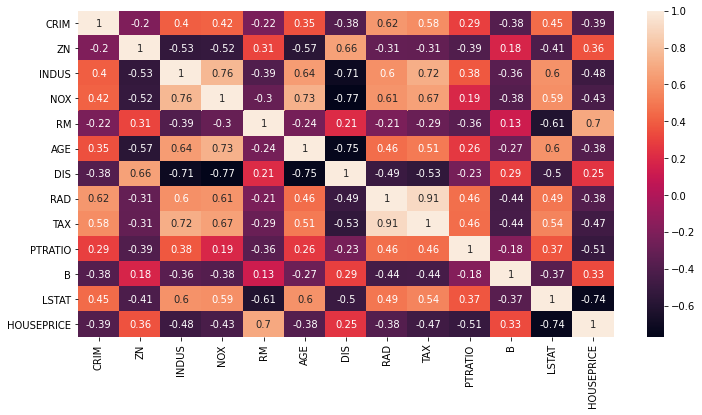

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

In [8]:
data.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [9]:
features=data.iloc[:,:-1]
label=data.iloc[:,[-1]]

In [10]:
print(features.shape)
print(label.shape)

(506, 12)
(506, 1)


In [11]:
#Feature Standization
from sklearn.preprocessing import StandardScaler

In [12]:
stdScaler=StandardScaler()

In [13]:
features=stdScaler.fit_transform(features)

In [14]:
features

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [15]:
#Label Normalization
from sklearn.preprocessing import MinMaxScaler
minMaxLabel = MinMaxScaler()
label = minMaxLabel.fit_transform(label)

In [16]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=1)

In [18]:
import tensorflow as tf
model=tf.keras.models.Sequential()

In [43]:
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
# model.add(tf.keras.layers.Dense(units=70,activation='tanh'))
model.add(tf.keras.layers.Dense(units=1,activation='linear')) # Output Layer

In [20]:
# Custom Metric Function ---> r2_keras_custom

def r2_keras_custom(y_true, y_pred):
    SS_res = tf.keras.backend.sum(tf.keras.backend.square(y_tr10ue - y_pred))
    SS_total = tf.keras.backend.sum(tf.keras.backend.square(y_true - tf.keras.backend.mean(y_true)))
    
    return (1 - SS_res / (SS_total + tf.keras.backend.epsilon()))

In [21]:
class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
    def on_epoch_end(self,epoch, logs):
        train_score = logs["r2_keras_custom"]
        test_score = logs["val_r2_keras_custom"]
        
        if tf.keras.backend.abs(test_score - train_score) < 5 and test_score > self.cl:
            self.model.stop_training = True

In [44]:
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=[r2_keras_custom])

In [46]:
myThresholdCallBack = MyThresholdCallBack(0.95)
history=model.fit(x=x_train,y=y_train,epochs=1000,validation_data=(x_test,y_test), callbacks=myThresholdCallBack)

Epoch 1/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0039 - r2_keras_custom: 0.8992 - val_loss: 0.0051 - val_r2_keras_custom: 0.9057
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0038 - r2_keras_custom: 0.9014 - val_loss: 0.0052 - val_r2_keras_custom: 0.9024
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0038 - r2_keras_custom: 0.8988 - val_loss: 0.0053 - val_r2_keras_custom: 0.8998
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0038 - r2_keras_custom: 0.9035 - val_loss: 0.0048 - val_r2_keras_custom: 0.9116
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0039 - r2_keras_custom: 0.9038 - val_loss: 0.0045 - val_r2_keras_custom: 0.9184
Epoch 6/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0035 - r2_keras_custom: 0.9048 - val_loss: 0.0044 - val_r2_keras_custom: 0.9190
Epoch 7/1000
13/13 [==============================] - 0s 6ms/ste

In [24]:
import matplotlib.pyplot as plt

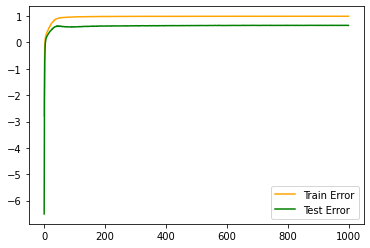

In [37]:
plt.plot(history.history['r2_keras_custom'],color='orange')
plt.plot(history.history['val_r2_keras_custom'], color ='green')
plt.legend(['Train Error','Test Error'])